# Importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() 
plt.rcParams["figure.figsize"] = (10,10)


# Loading all the dataframe stored as csv file

In [2]:
week1=pd.read_csv('MentionsAndSentimentDec12Dec19.csv')
week2=pd.read_csv('MentionsAndSentimentDec19Dec26.csv')
week3=pd.read_csv('MentionsAndSentimentDec26Jan2.csv')
week4=pd.read_csv('MentionsAndSentimentJan2Jan9.csv')
week5=pd.read_csv('MentionsAndSentimentJan9Jan16.csv')
week6=pd.read_csv('MentionsAndSentimentJan16Jan23.csv')
week7=pd.read_csv('MentionsAndSentimentJan23Jan30.csv')
week8=pd.read_csv('MentionsAndSentimentJan30Feb6.csv')
week9=pd.read_csv('MentionsAndSentimentFeb6Feb13.csv')

In [3]:
stock_name='FB'   #'AMC','NIO','FB','TSLA'

# Created a function to create a dataframe of a paticular stock only based on the stock name

In [4]:

def stock_analysis(stock_name):
    # download dataframe
    data = pdr.get_data_yahoo(stock_name, start="2021-12-12", end="2022-02-13",interval='1wk')
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    
    #calculate the percent change
    data['% change']=data['Adj Close'].pct_change()
    #filled the first cell that has no data with 0
    data['% change']=data['% change'].fillna(0)
    #reset the index
    data.reset_index(level=0,inplace=True)
    #rename the index
    data.rename(columns={'index': 'level_0'}, inplace=True)
    #append the all weeks dataframe
    final_df=week1.append([week2,week3,week4,week5,week6,week7,week8,week9])
    #create a dataframe only for a paticular stock 
    final=final_df[final_df['index']==stock_name]
    #reset the index
    final.reset_index(drop=True,inplace=True)
    final.reset_index(level=0,inplace=True)
    #added the date column in the final dataframe
    final['Date']=data['Date']
    #added stock price in the final dataframe
    final['Stock Price']=data['Adj Close']
    #change the datatype of date into string to make it easy for visualization
    final['Date']=final['Date'].astype('str')
    #again change it to dataframe
    final['Date']=pd.DataFrame(final['Date'])
    return final

In [8]:
df=stock_analysis('NIO')

[*********************100%***********************]  1 of 1 completed


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_12720/3780892275.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Date']=data['Date']
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_12720/3780892275.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Stock Price']=data['Adj Close']
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_12720/3780892275.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

# 1. Visualization of mentions of stocks 

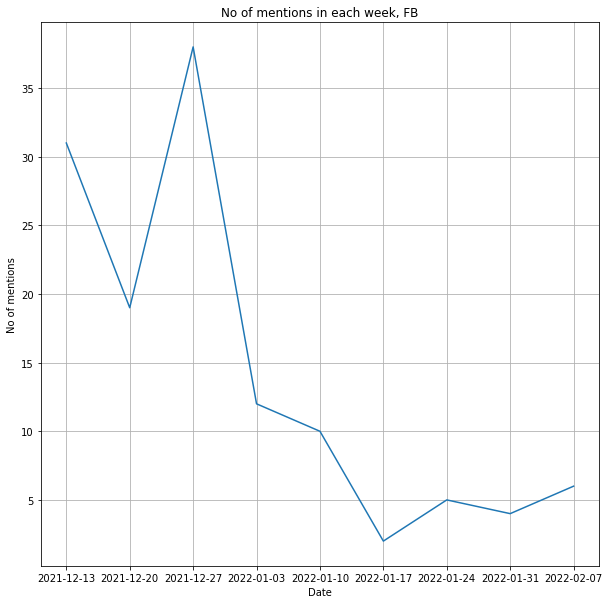

In [9]:
plt.plot(df['Date'],df['Mentions'])
plt.title('No of mentions in each week, '+stock_name )
plt.xlabel('Date')
plt.ylabel('No of mentions')
plt.grid()

In [ ]:
# 2.Visualition of sentiment o 

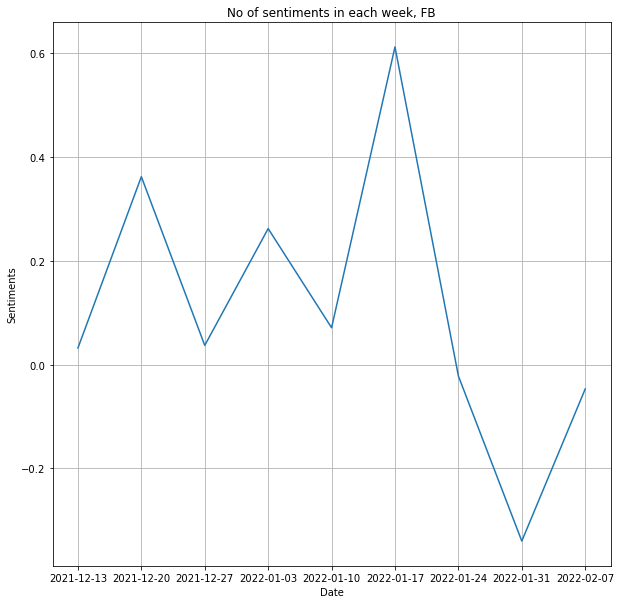

In [10]:
plt.plot(df['Date'],df['Total/Compound'])
plt.title('No of sentiments in each week, '+ stock_name)
plt.xlabel('Date')
plt.ylabel('Sentiments')
plt.grid()

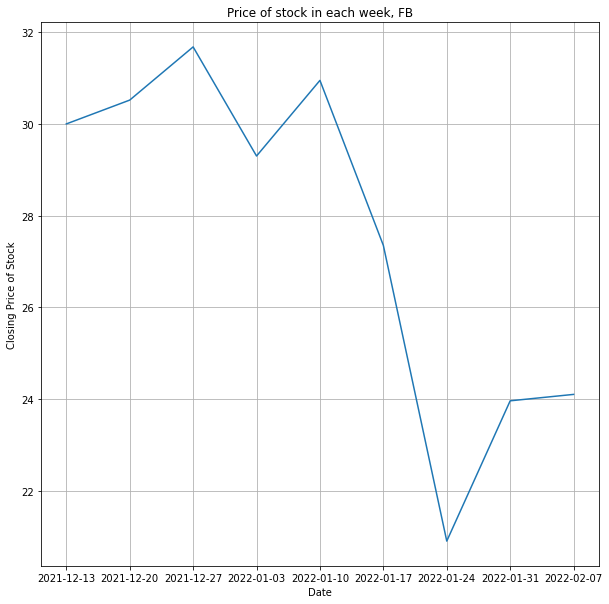

In [11]:
plt.plot(df['Date'],df['Stock Price'])
plt.title('Price of stock in each week, '+ stock_name)
plt.xlabel('Date')
plt.ylabel('Closing Price of Stock')
plt.grid()